### Pré-processamento

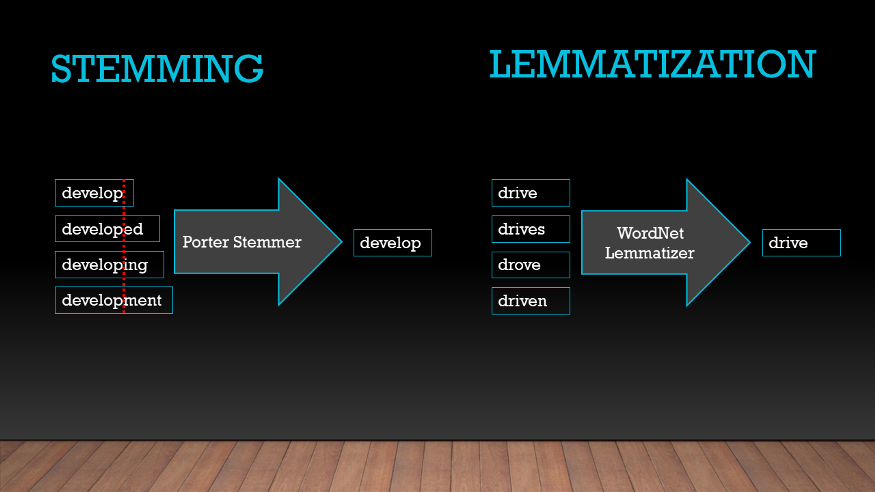!

In [3]:
# Preprocessamento

# Bibliotecas
import pandas as pd
from nltk.tokenize import word_tokenize  # tokenização
from nltk.stem import *  # importar PorterStemmer() e WordNetLemmatizer()
from nltk.corpus import stopwords  # Stopwords
import nltk  # para baixar os 'stopwords' e 'punkt' (punctuation)
import re  # regex

nltk.download('stopwords')
nltk.download('punkt')
# Define as stopwords em inglês
sw_english = set(stopwords.words('english'))

# Instancia o PorterStemmer e WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Função de preprocessamento - 
def preprocessing(string, method = 'stem'):
    """
    Preprocessing for english'
    """
    # Manter somente caracteres e números - sem caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    # Letras minúsculas
    string = string.lower()
    # tokenização
    words = word_tokenize(string)
    
    filter_words = [word for word in words if word not in sw_english]
    words = []
    
    if method == 'stem':
        for word in filter_words:
            sw = stemmer.stem(word)
            words.append(sw)
        return words
    if method == 'lemma':
        for word in filter_words:
            sw = lemmatizer.lemmatize(word)
            words.append(sw)
        return words
    
# use dataframe['nova_col'].apply(lambda x: preprocessing(x, "stem")) para criar uma nova coluna no dataframe

In [7]:
# testando o preprocessamento
movies = pd.read_csv("../dataset/movies.csv", index_col = 0)
movies.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
movies.shape

(50000, 2)

In [9]:
movies_sample = movies.sample(frac = 0.1, replace = False)

In [22]:
movies_sample['filtered_words'] = movies_sample["text"].apply(lambda x: preprocessing(x, "lemma"))

In [23]:
movies_sample.head()

,text,label,filtered_words
18910,Many critics have felt offended that R.W. Fass...,1,"[many, critic, felt, offended, r, w, fassbinde..."
21060,Gilles Mamouni is playing with the audience wi...,1,"[gilles, mamouni, playing, audience, story, ma..."
5331,Everybody who wants to be an editor should wat...,0,"[everybody, want, editor, watch, movie, show, ..."
24183,This is my fourth review of a Charlie Chan mov...,1,"[fourth, review, charlie, chan, movie, series,..."
11959,"As a South African, living in South Africa aga...",0,"[south, african, living, south, africa, 32, ye..."


In [24]:
movies_sample.iloc[0][0]

'Many critics have felt offended that R.W. Fassbinder has portrayed both protagonist Wilkie and the Nazis in this movie in a human-like manner. Connoisseurs of other Fassbinder films, however, will realize that "Lili Marleen" (1981) belongs to Fassbinder\'s "women movies" like "The Marriage of Maria Braun" (1979) and "Lola" (1981). Fassbinder was convinced that "stories can be told much better with women than with men", because, according to Fassbinder, while men usually fulfill their determined roles in society, "women are capable of thinking in a dialectic manner". Dialectics, however, means that there is not only a thesis and its antithesis like usually in our black-and-white world, but a synthesis where the oppositions coincide. Moreover, dialectic means that because of the third instance of synthesis the absolute opposition of the difference between thesis and antithesis is abolished. Concretely speaking: Starting from a dialect point of view and portraying the fascist state, the 

In [25]:
movies_sample.iloc[0][2]

['many',
 'critic',
 'felt',
 'offended',
 'r',
 'w',
 'fassbinder',
 'portrayed',
 'protagonist',
 'wilkie',
 'nazi',
 'movie',
 'human',
 'like',
 'manner',
 'connoisseur',
 'fassbinder',
 'film',
 'however',
 'realize',
 'lili',
 'marleen',
 '1981',
 'belongs',
 'fassbinder',
 'woman',
 'movie',
 'like',
 'marriage',
 'maria',
 'braun',
 '1979',
 'lola',
 '1981',
 'fassbinder',
 'convinced',
 'story',
 'told',
 'much',
 'better',
 'woman',
 'men',
 'according',
 'fassbinder',
 'men',
 'usually',
 'fulfill',
 'determined',
 'role',
 'society',
 'woman',
 'capable',
 'thinking',
 'dialectic',
 'manner',
 'dialectic',
 'however',
 'mean',
 'thesis',
 'antithesis',
 'like',
 'usually',
 'black',
 'white',
 'world',
 'synthesis',
 'opposition',
 'coincide',
 'moreover',
 'dialectic',
 'mean',
 'third',
 'instance',
 'synthesis',
 'absolute',
 'opposition',
 'difference',
 'thesis',
 'antithesis',
 'abolished',
 'concretely',
 'speaking',
 'starting',
 'dialect',
 'point',
 'view',
 'port

----

In [ ]:
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import pandas as pd

In [ ]:
# Nova maneira da aula 5
def preprocessing(string):
    """
    Preprocessing for english'
    """
    # Manter somente caracteres e números - sem caracteres especiais
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    # Ideal para strings menores. Para datasets grandes, usar o processamento anterior
    txt = [token.lemma_.lower() for token in string if not token.is_stop and not token.is_punct]
    
    return txt

----

### Salvando um modelo treinado

In [ ]:
model.save("model_w2v.bin")

In [ ]:
model2 = Word2Vec.load('model_w2v.bin')

---

### Web Scrapping

In [4]:
# Bibliotecas para web scrapping
import urllib
import requests
from bs4 import BeautifulSoup

def web_scrapping(url):
    """
    Web Scrapping : Coleta de texto do site
    """
    text_file = urllib.request.urlopen(url)
    # HTML
    response = text_file.read()
    soup = BeautifulSoup(response, 'html.parser')
    # Texto 
    text = soup.get_text()
    text = text.lower()
    
    return text

In [5]:
web_scrapping("https://edition.cnn.com/europe/live-news/russia-ukraine-war-news-09-05-22/index.html")

'september 5, 2022 russia-ukraine newsopen menuworldafricaamericasasiaaustraliamorechinaeuropeindiamiddle eastunited kingdomaudiosearch cnnafricaamericasasiaaustraliachinaeuropeindiamiddle eastunited kingdomsearchaudioeditionu.s.internationalarabicespañoleditionu.s.internationalarabicespañolworldafricaamericasasiaaustraliachinaeuropeindiamiddle eastunited kingdomus politicsthe biden presidencyfacts firstus electionsbusinessmarketstechmediasuccessperspectivesvideoshealthlife, but betterfitnessfoodsleepmindfulnessrelationshipsentertainmentstarsscreenbingeculturemediatechinnovategadgetforeseeable futuremission: aheadupstartswork transformedinnovative citiesstyleartsdesignfashionarchitectureluxurybeautyvideotraveldestinationsfood and drinkstaynewsvideossportsfootballtennisgolfolympicsus sportsclimbingmotorsportesportsvideoslive tv digital studioscnn filmshlntv scheduletv shows a-zcnnvrfeaturesas equalscall to earthfreedom projectimpact your worldinside africa2 degreescnn heroesall features

---

### train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = fake['joined_words']
y = fake['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

----

### Modelos de Machine Learning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [1]:
class DenseTransformer():
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

gscv = StratifiedKFold(n_splits=3, shuffle=True)

algorithms = {'logistic':  GridSearchCV(Pipeline([
                                                ('tfidf', TfidfVectorizer()),
                                                ('log', LogisticRegression())]),
                                                param_grid={'log__penalty': ['l1', 'l2'],
                                                            'log__solver': ['liblinear']
                                                           },
                                                            scoring=['roc_auc', 'f1', 'accuracy'],
                                                            refit='f1',
                                                            cv=gscv),
              'randomforest':  GridSearchCV(Pipeline([
                                                  ('tfidf', TfidfVectorizer()),
                                                  ('rf', RandomForestClassifier())]),
                                                  param_grid={'rf__max_depth': [5, 20],
                                                              'rf__criterion': ['entropy', 'gini'],
                                                             },
                                                             scoring=['roc_auc', 'f1', 'accuracy'],
                                                             cv=gscv),
              'randomforest_pca':  GridSearchCV(Pipeline([
                                                  ('tfidf', TfidfVectorizer()),
                                                  ('to_dense', DenseTransformer()),
                                                  ('pca', PCA(n_components=50)),
                                                  ('rf', RandomForestClassifier())]),
                                                  param_grid={'rf__max_depth': [5, 20],
                                                              'rf__criterion': ['entropy', 'gini']
                                                             },
                                                             scoring=['roc_auc', 'f1', 'accuracy'],
                                                             cv=gscv),
              'svmrbf': GridSearchCV(Pipeline([
                                              ('tfidf', TfidfVectorizer()),
                                              ('svm', SVC(kernel='rbf'))]),
                                              param_grid={'pca__n_components': [2, 10],
                                                          'svm__C': [1.0],
                                                          'svm__gamma': [0.1, 2.0]
                                                         },
                                                         scoring=['roc_auc', 'f1', 'accuracy'],
                                                         cv=gscv)
                                                         }

In [ ]:
results = {}

for alg, clf in algorithms.items():
    clf.fit(X_train, y_train) 
    results[alg] = clf.cv_results_
    print(f"Algoritmo treinado: {alg}\t Duração: {t1-t0}")

print(f"\nTempo total: {t1-t}")
results = pd.DataFrame.from_dict(results)